In [1]:
#Code to find the spatial correlation between the different consistency algorithms
import numpy as np
import glob
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import warnings
import dask.array as da
import dask
import matplotlib as mpl
import xarray as xr
import numpy.ma as ma

In [2]:
#Read the consistency scale values from the different algorithms
Cascade_bard=np.load('CBcsv.npy')
Mundhenk=np.load('MDcsv.npy')
ClimateNet_DL=np.load('CNcsv.npy')
Reid=np.load('RDcsv.npy')
Guan_Waliser=np.load('GWcsv.npy')
#WA=np.load('WAcsv.npy')
IVT=np.load('IVTcsv.npy')
IVT16= np.load("/N/u/dkamnani/BigRed200/Paper plots/IVTcsv16yrs.npy")
WA16=np.load("/N/u/dkamnani/BigRed200/Paper plots/WAcsv16yrs.npy")
print(Guan_Waliser.shape)

(361, 576)


In [3]:
# Put your datasets in a list
datasets = [IVT, Cascade_bard, Mundhenk, Guan_Waliser, Reid, ClimateNet_DL,IVT16,WA16]

# Calculate the number of datasets
num_datasets = len(datasets)

# Initialize an empty correlation matrix
correlation_matrix = np.zeros((num_datasets, num_datasets))

# Calculate the correlation coefficients
for i in range(num_datasets):
    for j in range(num_datasets):
        data1 = datasets[i]
        data2 = datasets[j]
        
        # Filter out NaN values from both datasets
        valid_indices = ~np.logical_or(np.isnan(data1), np.isnan(data2))
        data1_valid = data1[valid_indices]
        data2_valid = data2[valid_indices]
        
        # Calculate the correlation coefficient for the valid data
        correlation_matrix[i, j] = np.corrcoef(data1_valid, data2_valid)[0, 1]

# Algorithm labels
algorithm_labels = ["IVT","TECA-BARD v1.0.1", "Mundhenk", "Guan and Waliser", "Reid et al." ,"ClimateNet","IVT16","WA16"]

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
[[1.         0.69049079 0.44049182 0.50737918 0.49657163 0.11316753
  0.93229537 0.43746189]
 [0.69049079 1.         0.62247036 0.46134655 0.51167022 0.04585628
  0.61747593 0.16658074]
 [0.44049182 0.62247036 1.         0.75026907 0.68676338 0.33894385
  0.403497   0.32984968]
 [0.50737918 0.46134655 0.75026907 1.         0.63491119 0.44358698
  0.49266381 0.44276551]
 [0.49657163 0.51167022 0.68676338 0.63491119 1.         0.42721957
  0.4489809  0.31798697]
 [0.11316753 0.04585628 0.33894385 0.44358698 0.42721957 1.
  0.10619681 0.2689543 ]
 [0.93229537 0.61747593 0.403497   0.49266381 0.4489809  0.10619681
  1.         0.42966722]
 [0.43746189 0.16658074 0.32984968 0.44276551 0.31798697 0.2689543
  0.42966722 1.        ]]


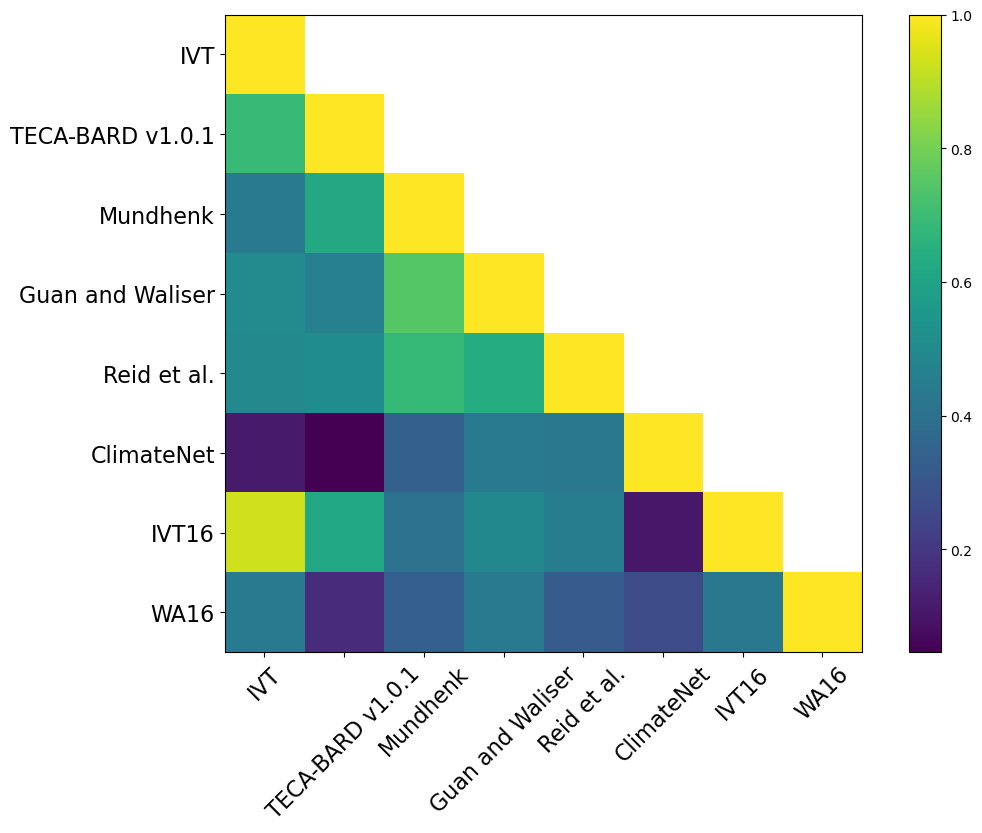

<Figure size 640x480 with 0 Axes>

In [8]:
# Set the upper triangular part of the correlation matrix to NaN
correlation_matrix[np.triu_indices(num_datasets, 1)] = np.nan
#correlation_matrix[np.triu_indices(num_datasets, 1)] = np.nan
# Create a figure and axis for the heatmap
fig, ax = plt.subplots(figsize=(9,8.5))
cax = ax.matshow(correlation_matrix, cmap='viridis')

# Set the axis labels and tick positions
#Set x ticks at the bottom of the plot
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(np.arange(num_datasets))
ax.set_yticks(np.arange(num_datasets))
ax.set_xticklabels(algorithm_labels,rotation=45,fontsize=16)
ax.set_yticklabels(algorithm_labels,fontsize=16)


# Display the colorbar
cbar = plt.colorbar(cax)

fig.subplots_adjust(bottom=0.2, top=0.95, left=0.01, right=1.05,
                    wspace=-0.2, hspace=0.25)

# Set the title and show the plot
#plt.title('Correlation matrix for the Consistency Scale Values of different algorithms and IVT')
plt.savefig("Figure7.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()
plt.tight_layout()